In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

from simple.grid_world_env import GridWorldEnvSlow, GridWorldEnvFast
from mc import MonteCarloAgent
from q_learning import QLearningAgent
from sarsa import SarsaAgent

In [ ]:
random_seed = 2020
np.random.seed(random_seed)
random.seed(random_seed)


height = 4
width = 4
number_of_holes = 4

state_size = height * width

num_episodes = 1000
max_steps_per_episode = 100

slow_env = GridWorldEnvSlow(height, width, number_of_holes)

random_seed = 2020
np.random.seed(random_seed)
random.seed(random_seed)

fast_env = GridWorldEnvFast(height, width, number_of_holes)

## Monte Carlo algorithm

In [17]:
action_size = len(slow_env.actions)

mc_agent = MonteCarloAgent(slow_env, state_size=state_size, action_size=action_size)

rewards_per_episode = []
steps_per_episode = []

for episode in range(num_episodes):
	state = slow_env.reset()  # Reset environment
	done = False
	total_reward = 0
	steps = 0
	trajectory = []

	for _ in range(max_steps_per_episode):
		action = mc_agent.choose_action(state)
		next_state, reward, done, _ = slow_env.step(slow_env.actions[action])
		
		trajectory.append((state, action, reward))
		state = next_state
		total_reward += reward
		steps += 1

		if done:
			break

	mc_agent.learn(trajectory)
	rewards_per_episode.append(total_reward)
	steps_per_episode.append(steps)

	if (episode + 1) % 100 == 0:
		print(f"Episode {episode + 1}/{num_episodes}: Reward = {total_reward}, Epsilon = {mc_agent.epsilon:.4f}")



def plot_r_s(rewards_per_episode, steps_per_episode):
	# Plotting the rewards and steps over episodes
	plt.figure(figsize=(12, 5))

	plt.subplot(1, 2, 1)
	plt.plot(rewards_per_episode)
	plt.title('Total Rewards per Episode')
	plt.xlabel('Episode')
	plt.ylabel('Total Reward')

	plt.subplot(1, 2, 2)
	plt.plot(steps_per_episode)
	plt.title('Steps per Episode')
	plt.xlabel('Episode')
	plt.ylabel('Steps')

	plt.tight_layout()
	plt.show()


plot_r_s(rewards_per_episode, steps_per_episode)

Episode 100/10000: Reward = -1, Epsilon = 0.4240
Episode 200/10000: Reward = 1, Epsilon = 0.2569
Episode 300/10000: Reward = 1, Epsilon = 0.1556
Episode 400/10000: Reward = -1, Epsilon = 0.0943
Episode 500/10000: Reward = 1, Epsilon = 0.0571
Episode 600/10000: Reward = 1, Epsilon = 0.0346
Episode 700/10000: Reward = 1, Epsilon = 0.0210
Episode 800/10000: Reward = 1, Epsilon = 0.0127
Episode 900/10000: Reward = 1, Epsilon = 0.0100
Episode 1000/10000: Reward = 1, Epsilon = 0.0100
Episode 1100/10000: Reward = 1, Epsilon = 0.0100
Episode 1200/10000: Reward = 1, Epsilon = 0.0100
Episode 1300/10000: Reward = 1, Epsilon = 0.0100
Episode 1400/10000: Reward = 1, Epsilon = 0.0100
Episode 1500/10000: Reward = 1, Epsilon = 0.0100
Episode 1600/10000: Reward = 1, Epsilon = 0.0100
Episode 1700/10000: Reward = 1, Epsilon = 0.0100
Episode 1800/10000: Reward = 1, Epsilon = 0.0100
Episode 1900/10000: Reward = 1, Epsilon = 0.0100
Episode 2000/10000: Reward = 1, Epsilon = 0.0100
Episode 2100/10000: Reward 

KeyboardInterrupt: 

In [ ]:
# Display learned policy
slow_mc_learned_policy = mc_agent.policy()
print("\nLearned Monte Carlo Policy:")
slow_env.print_policy(slow_mc_learned_policy)


Learned Monte Carlo Policy:
+---+---+---+---+
| ↓ | ← | ← | X |
+---+---+---+---+
| ↓ | X | ↑ | ← |
+---+---+---+---+
| ↓ | X | ↑ | X |
+---+---+---+---+
| → | → | → | T |
+---+---+---+---+



## SARSA algorithm

Episode 100/1000: Reward = 1, Epsilon = 0.3635
Episode 200/1000: Reward = 1, Epsilon = 0.2202
Episode 300/1000: Reward = 1, Epsilon = 0.1334
Episode 400/1000: Reward = 1, Epsilon = 0.0808
Episode 500/1000: Reward = 1, Epsilon = 0.0489
Episode 600/1000: Reward = 1, Epsilon = 0.0296
Episode 700/1000: Reward = 1, Epsilon = 0.0180
Episode 800/1000: Reward = 1, Epsilon = 0.0109
Episode 900/1000: Reward = 1, Epsilon = 0.0100
Episode 1000/1000: Reward = 1, Epsilon = 0.0100


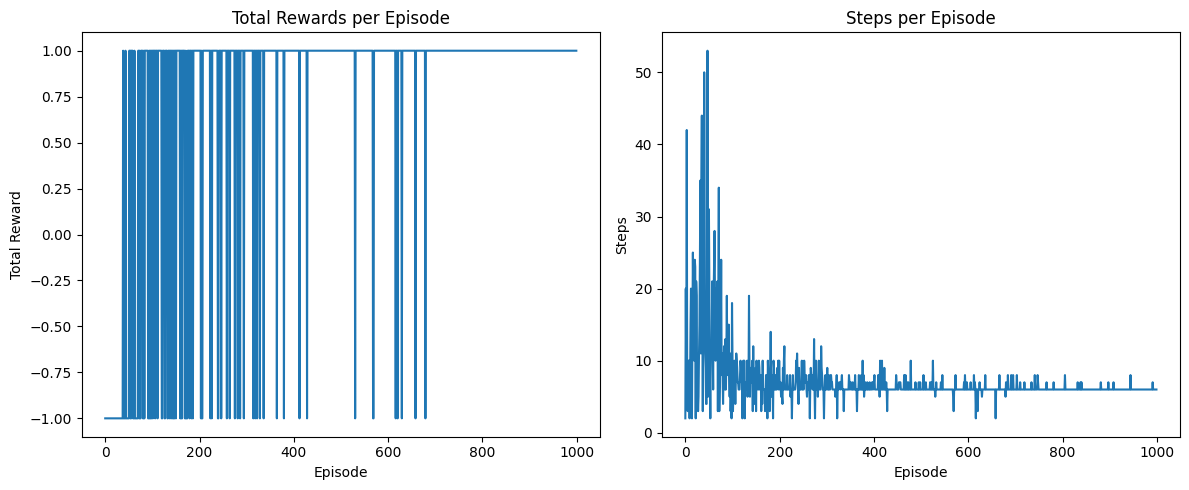

In [ ]:
sarsa_agent = SarsaAgent(slow_env, state_size=state_size, action_size=action_size)

rewards_per_episode = []
steps_per_episode = []

for episode in range(num_episodes):
	state = slow_env.reset()  # Reset environment
	action = sarsa_agent.choose_action(state)
	done = False
	total_reward = 0
	steps = 0

	for _ in range(max_steps_per_episode):
		next_state, reward, done, _ = slow_env.step(slow_env.actions[action])
		next_action = sarsa_agent.choose_action(next_state)
		
		sarsa_agent.learn(state, action, reward, next_state, next_action, done)

		state = next_state
		action = next_action
		total_reward += reward
		steps += 1

		if done:
			break

	rewards_per_episode.append(total_reward)
	steps_per_episode.append(steps)

	if (episode + 1) % 100 == 0:
		print(f"Episode {episode + 1}/{num_episodes}: Reward = {total_reward}, Epsilon = {sarsa_agent.epsilon:.4f}")


plot_r_s(rewards_per_episode, steps_per_episode)


In [ ]:
# Display learned policy
slow_sarsa_learned_policy = sarsa_agent.policy()
print("\nLearned SARSA Policy:")
slow_env.print_policy(slow_sarsa_learned_policy)


Learned SARSA Policy:
+---+---+---+---+
| ↓ | ← | ← | X |
+---+---+---+---+
| ↓ | X | ↑ | ← |
+---+---+---+---+
| ↓ | X | ↓ | X |
+---+---+---+---+
| → | → | → | T |
+---+---+---+---+



## Q Learning algorithm

Episode 100/1000 - Total Reward: -1, Steps: 24, Epsilon: 0.3635
Episode 200/1000 - Total Reward: 1, Steps: 9, Epsilon: 0.2202
Episode 300/1000 - Total Reward: 1, Steps: 8, Epsilon: 0.1334
Episode 400/1000 - Total Reward: 1, Steps: 6, Epsilon: 0.0808
Episode 500/1000 - Total Reward: 1, Steps: 6, Epsilon: 0.0489
Episode 600/1000 - Total Reward: 1, Steps: 6, Epsilon: 0.0296
Episode 700/1000 - Total Reward: 1, Steps: 6, Epsilon: 0.0180
Episode 800/1000 - Total Reward: 1, Steps: 6, Epsilon: 0.0109
Episode 900/1000 - Total Reward: 1, Steps: 6, Epsilon: 0.0100
Episode 1000/1000 - Total Reward: 1, Steps: 6, Epsilon: 0.0100


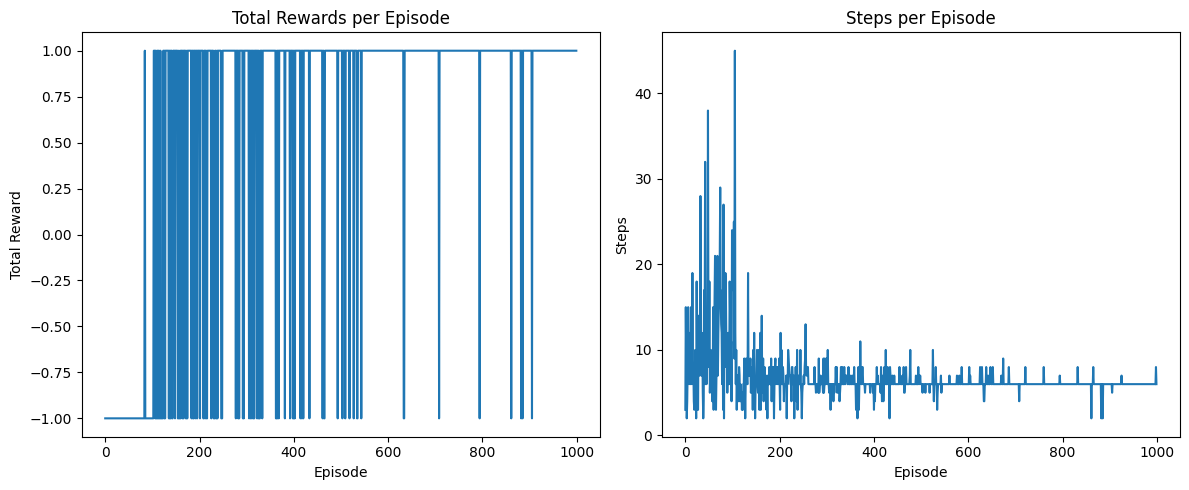

In [ ]:
q_agent = QLearningAgent(slow_env, state_size=state_size, action_size=action_size)

rewards_per_episode = []
steps_per_episode = []

for episode in range(num_episodes):
	state = slow_env.reset()  # Reset slow_environment at the start of each episode
	done = False
	total_reward = 0
	steps = 0

	for step in range(max_steps_per_episode):
		action = q_agent.choose_action(state)  # Choose an action based on current policy
		next_state, reward, done, _ = slow_env.step(slow_env.actions[action])

		q_agent.learn(state, action, reward, next_state, done)

		state = next_state
		total_reward += reward
		steps += 1

		if done:
			break

	rewards_per_episode.append(total_reward)
	steps_per_episode.append(steps)

	if (episode + 1) % 100 == 0:
		print(f"Episode {episode + 1}/{num_episodes} - Total Reward: {total_reward}, Steps: {steps}, Epsilon: {q_agent.epsilon:.4f}")


plot_r_s(rewards_per_episode, steps_per_episode)

In [ ]:
slow_q_learned_policy = q_agent.policy()
print("Learned Q-learning Policy:")
slow_env.print_policy(slow_q_learned_policy)


Learned Q-learning Policy:
+---+---+---+---+
| → | → | ↓ | X |
+---+---+---+---+
| ↑ | X | ↓ | ← |
+---+---+---+---+
| ↑ | X | ↓ | X |
+---+---+---+---+
| ↑ | → | → | T |
+---+---+---+---+



# Fast grid world
In this section we add a tick constraint which penalises the agent even on neutral boxes.
Rewards : 
- neutral  : $-1$
- pit 	   : $-10$
- terminal :  $10$

## Monte Carlo algorithm

Episode 100/1000: Reward = -14, Epsilon = 0.4240


Episode 200/1000: Reward = -16, Epsilon = 0.2569
Episode 300/1000: Reward = 5, Epsilon = 0.1556
Episode 400/1000: Reward = 5, Epsilon = 0.0943
Episode 500/1000: Reward = 5, Epsilon = 0.0571
Episode 600/1000: Reward = 5, Epsilon = 0.0346
Episode 700/1000: Reward = 5, Epsilon = 0.0210
Episode 800/1000: Reward = 5, Epsilon = 0.0127
Episode 900/1000: Reward = 5, Epsilon = 0.0100
Episode 1000/1000: Reward = 5, Epsilon = 0.0100


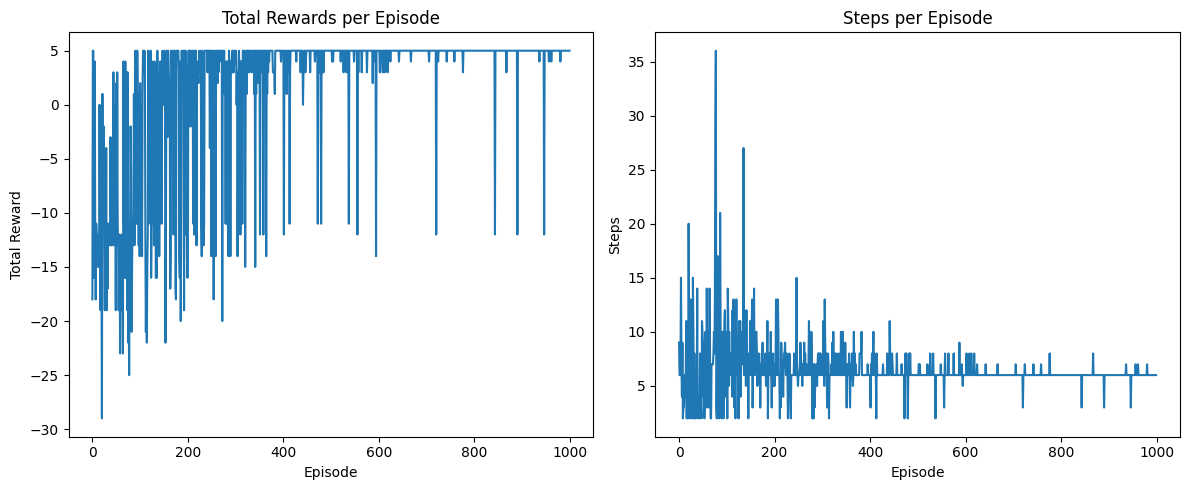

In [ ]:
action_size = len(fast_env.actions)

mc_agent = MonteCarloAgent(fast_env, state_size=state_size, action_size=action_size)

rewards_per_episode = []
steps_per_episode = []

for episode in range(num_episodes):
	state = fast_env.reset()  # Reset environment
	done = False
	total_reward = 0
	steps = 0
	trajectory = []

	for _ in range(max_steps_per_episode):
		action = mc_agent.choose_action(state)
		next_state, reward, done, _ = fast_env.step(fast_env.actions[action])
		
		trajectory.append((state, action, reward))
		state = next_state
		total_reward += reward
		steps += 1

		if done:
			break

	mc_agent.learn(trajectory)
	rewards_per_episode.append(total_reward)
	steps_per_episode.append(steps)

	if (episode + 1) % 100 == 0:
		print(f"Episode {episode + 1}/{num_episodes}: Reward = {total_reward}, Epsilon = {mc_agent.epsilon:.4f}")



def plot_r_s(rewards_per_episode, steps_per_episode):
	# Plotting the rewards and steps over episodes
	plt.figure(figsize=(12, 5))

	plt.subplot(1, 2, 1)
	plt.plot(rewards_per_episode)
	plt.title('Total Rewards per Episode')
	plt.xlabel('Episode')
	plt.ylabel('Total Reward')

	plt.subplot(1, 2, 2)
	plt.plot(steps_per_episode)
	plt.title('Steps per Episode')
	plt.xlabel('Episode')
	plt.ylabel('Steps')

	plt.tight_layout()
	plt.show()


plot_r_s(rewards_per_episode, steps_per_episode)

In [ ]:
# Display learned policy
fast_mc_learned_policy = mc_agent.policy()
print("\nLearned Monte Carlo Policy for slow:")
slow_env.print_policy(slow_mc_learned_policy)
print("\nLearned Monte Carlo Policy for fast:")
fast_env.print_policy(fast_mc_learned_policy)


Learned Monte Carlo Policy for slow:
+---+---+---+---+
| ↓ | ← | ← | X |
+---+---+---+---+
| ↓ | X | ↑ | ← |
+---+---+---+---+
| ↓ | X | ↑ | X |
+---+---+---+---+
| → | → | → | T |
+---+---+---+---+


Learned Monte Carlo Policy for fast:
+---+---+---+---+
| ↓ | → | ↓ | X |
+---+---+---+---+
| ↓ | X | ↓ | → |
+---+---+---+---+
| ↓ | X | ↓ | X |
+---+---+---+---+
| → | → | → | T |
+---+---+---+---+



## SARSA algorithm

Episode 100/1000: Reward = 4, Epsilon = 0.3635
Episode 200/1000: Reward = -12, Epsilon = 0.2202
Episode 300/1000: Reward = 5, Epsilon = 0.1334
Episode 400/1000: Reward = 5, Epsilon = 0.0808
Episode 500/1000: Reward = 5, Epsilon = 0.0489
Episode 600/1000: Reward = 5, Epsilon = 0.0296
Episode 700/1000: Reward = 5, Epsilon = 0.0180
Episode 800/1000: Reward = 5, Epsilon = 0.0109
Episode 900/1000: Reward = 5, Epsilon = 0.0100
Episode 1000/1000: Reward = 5, Epsilon = 0.0100


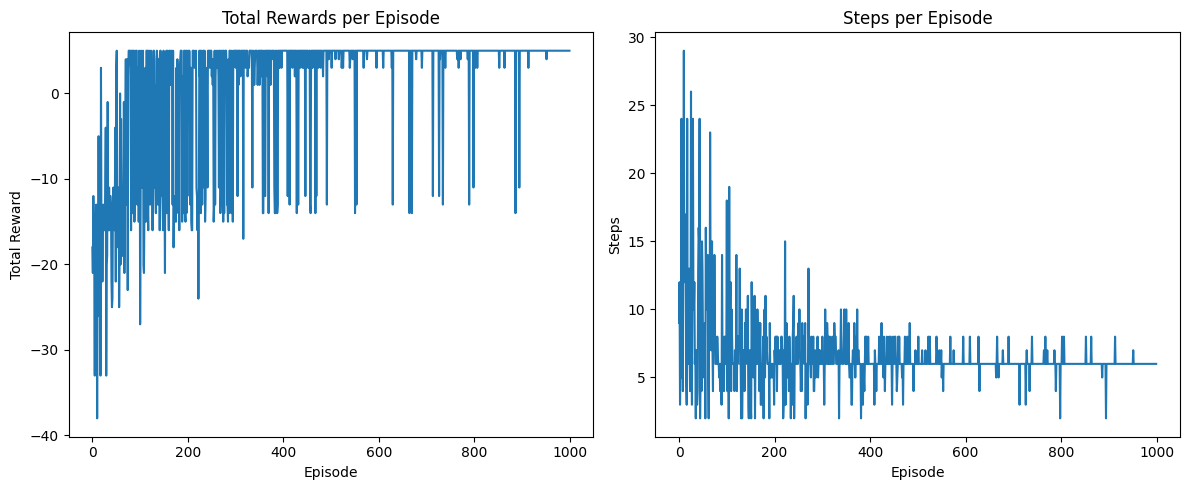

In [ ]:
sarsa_agent = SarsaAgent(fast_env, state_size=state_size, action_size=action_size)

rewards_per_episode = []
steps_per_episode = []

for episode in range(num_episodes):
	state = fast_env.reset()  # Reset environment
	action = sarsa_agent.choose_action(state)
	done = False
	total_reward = 0
	steps = 0

	for _ in range(max_steps_per_episode):
		next_state, reward, done, _ = fast_env.step(fast_env.actions[action])
		next_action = sarsa_agent.choose_action(next_state)
		
		sarsa_agent.learn(state, action, reward, next_state, next_action, done)

		state = next_state
		action = next_action
		total_reward += reward
		steps += 1

		if done:
			break

	rewards_per_episode.append(total_reward)
	steps_per_episode.append(steps)

	if (episode + 1) % 100 == 0:
		print(f"Episode {episode + 1}/{num_episodes}: Reward = {total_reward}, Epsilon = {sarsa_agent.epsilon:.4f}")


plot_r_s(rewards_per_episode, steps_per_episode)

In [ ]:
# Display learned policy
fast_sarsa_learned_policy = sarsa_agent.policy()
print("\nLearned SARSA Policy on slow:")
slow_env.print_policy(slow_sarsa_learned_policy)
print("\nLearned SARSA Policy on fast:")
fast_env.print_policy(fast_sarsa_learned_policy)


Learned SARSA Policy on slow:
+---+---+---+---+
| ↓ | ← | ← | X |
+---+---+---+---+
| ↓ | X | ↑ | ← |
+---+---+---+---+
| ↓ | X | ↓ | X |
+---+---+---+---+
| → | → | → | T |
+---+---+---+---+


Learned SARSA Policy on fast:
+---+---+---+---+
| → | → | ↓ | X |
+---+---+---+---+
| ↑ | X | ↓ | ← |
+---+---+---+---+
| ↓ | X | ↓ | X |
+---+---+---+---+
| → | → | → | T |
+---+---+---+---+



## Q Leaarning algorithm

Episode 100/1000 - Total Reward: 2, Steps: 9, Epsilon: 0.3635
Episode 200/1000 - Total Reward: 4, Steps: 7, Epsilon: 0.2202
Episode 300/1000 - Total Reward: 5, Steps: 6, Epsilon: 0.1334
Episode 400/1000 - Total Reward: 5, Steps: 6, Epsilon: 0.0808
Episode 500/1000 - Total Reward: 5, Steps: 6, Epsilon: 0.0489
Episode 600/1000 - Total Reward: 5, Steps: 6, Epsilon: 0.0296
Episode 700/1000 - Total Reward: 5, Steps: 6, Epsilon: 0.0180
Episode 800/1000 - Total Reward: 3, Steps: 8, Epsilon: 0.0109
Episode 900/1000 - Total Reward: 5, Steps: 6, Epsilon: 0.0100
Episode 1000/1000 - Total Reward: 5, Steps: 6, Epsilon: 0.0100


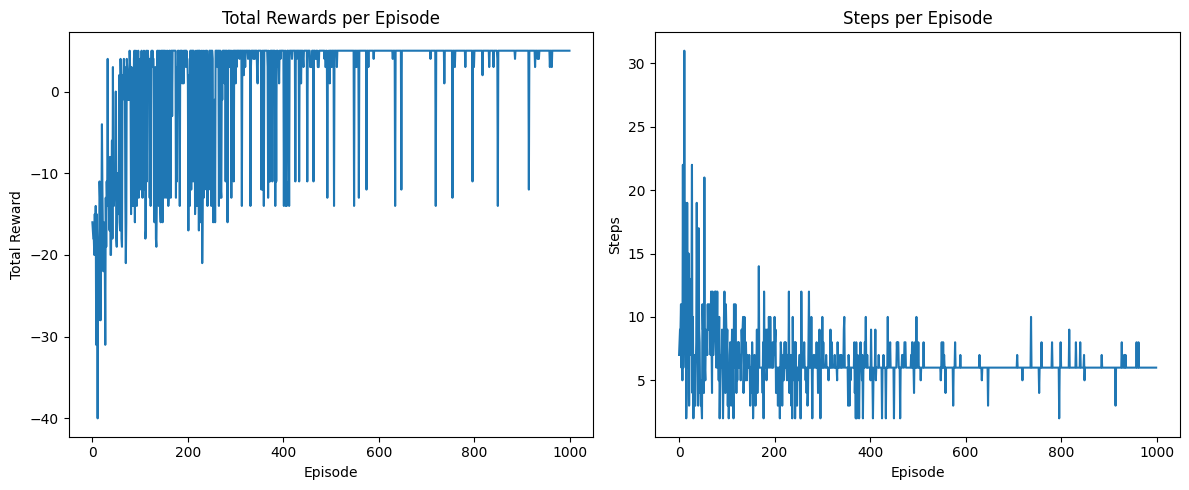

In [ ]:
q_agent = QLearningAgent(fast_env, state_size=state_size, action_size=action_size)

rewards_per_episode = []
steps_per_episode = []

for episode in range(num_episodes):
	state = fast_env.reset()  # Reset slow_environment at the start of each episode
	done = False
	total_reward = 0
	steps = 0

	for step in range(max_steps_per_episode):
		action = q_agent.choose_action(state)  # Choose an action based on current policy
		next_state, reward, done, _ = fast_env.step(fast_env.actions[action])

		q_agent.learn(state, action, reward, next_state, done)

		state = next_state
		total_reward += reward
		steps += 1

		if done:
			break

	rewards_per_episode.append(total_reward)
	steps_per_episode.append(steps)

	if (episode + 1) % 100 == 0:
		print(f"Episode {episode + 1}/{num_episodes} - Total Reward: {total_reward}, Steps: {steps}, Epsilon: {q_agent.epsilon:.4f}")


plot_r_s(rewards_per_episode, steps_per_episode)

In [ ]:
fast_q_learned_policy = q_agent.policy()
print("Learned Q-learning Policy on slow:")
slow_env.print_policy(slow_q_learned_policy)
print("Learned Q-learning Policy on fast:")
fast_env.print_policy(fast_q_learned_policy)

Learned Q-learning Policy on slow:
+---+---+---+---+
| → | → | ↓ | X |
+---+---+---+---+
| ↑ | X | ↓ | ← |
+---+---+---+---+
| ↑ | X | ↓ | X |
+---+---+---+---+
| ↑ | → | → | T |
+---+---+---+---+

Learned Q-learning Policy on fast:
+---+---+---+---+
| → | → | ↓ | X |
+---+---+---+---+
| ↓ | X | ↓ | ← |
+---+---+---+---+
| ↓ | X | ↓ | X |
+---+---+---+---+
| → | → | → | T |
+---+---+---+---+

